# **Weather data outlier detection**

In [10]:
import pandas as pd               #Өгөгдөлтэй ажиллах функц
import seaborn as sns             #Өгөгдлийг дүрсэлж гаргах функц
import matplotlib.pyplot as plt   #Өгөгдлийг дүрсэлж гаргах функц
import numpy as np                #Тоон өгөгдөлтэй ажиллах функц

In [11]:
humid = pd.read_csv('/home/barkowich/Documents/anaconda/ml/weather/21h.csv')
press = pd.read_csv('/home/barkowich/Documents/anaconda/ml/weather/21p.csv')
tempr = pd.read_csv('/home/barkowich/Documents/anaconda/ml/weather/21t.csv')

In [12]:
merged = humid
merged = merged.join(press, lsuffix="_left")          #тус бүрийн багануудыг нэгтгэнэ
merged = merged.join(tempr, lsuffix="_left" )
merged.shape                                          #Өгөгдлийн хэлбэр хэмжээг үзүүлнэ

(192718, 3)

In [13]:
merged.columns = ["Humidity", "Pressure", "Temperature"]      #Баганы нэрийг солих үйлдэл
merged.head()

,Humidity,Pressure,Temperature
0,0.742,1037.400000,-33.0
1,0.742,1037.033333,-33.0
2,0.668,1036.666667,-34.0
3,0.742,1036.300000,-33.0
4,0.673,1035.933333,-32.0


In [14]:
df = pd.DataFrame()
df['Timestamp'] = pd.DataFrame(pd.date_range(start="2010-01-01", end="2020-12-31", freq='30T'))
merged = merged.join(df, how = 'left')
merged.head()

,Humidity,Pressure,Temperature,Timestamp
0,0.742,1037.400000,-33.0,2010-01-01 00:00:00
1,0.742,1037.033333,-33.0,2010-01-01 00:30:00
2,0.668,1036.666667,-34.0,2010-01-01 01:00:00
3,0.742,1036.300000,-33.0,2010-01-01 01:30:00
4,0.673,1035.933333,-32.0,2010-01-01 02:00:00


## **Plotting datasets**

In [15]:
# Data Plot  
    
def plotvariable(df, variable):
    plt.figure(figsize=(16,4))
    #histogram
    plt.subplot(1,2,1)
    plt.hist(df[variable],alpha=0.5)

    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(df[variable])
    plt.show()

In [16]:
from scipy.stats import norm
def plot_bell(data,name_xlabel):
  plt.hist(data, bins=20, rwidth=0.8, density=True)
  plt.xlabel(name_xlabel)
  plt.ylabel('Count')

  rng = np.arange(data.min(), data.max(), 0.1)
  plt.plot(rng, norm.pdf(rng,data.mean(),data.std()))

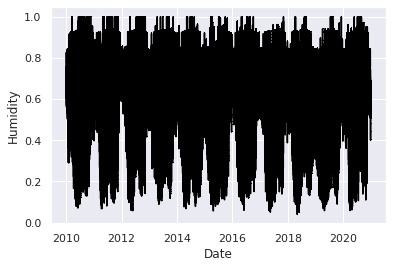

In [17]:
plt.plot(merged['Timestamp'], merged['Humidity'], color='black', marker=',')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

/home/barkowich/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


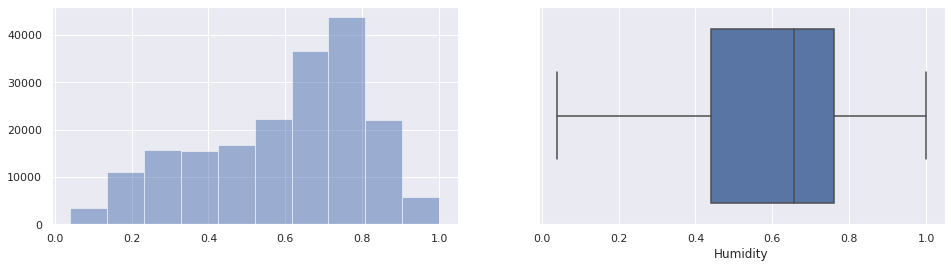

In [18]:
plotvariable(merged,'Humidity')

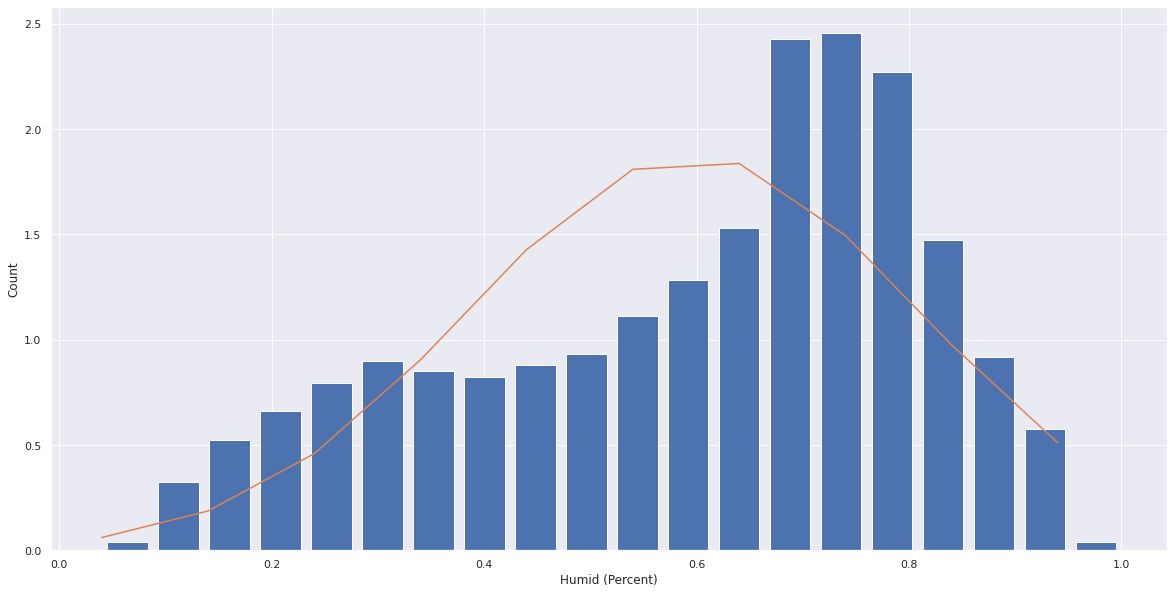

In [19]:
plot_bell(merged.Humidity, 'Humid (Percent)')

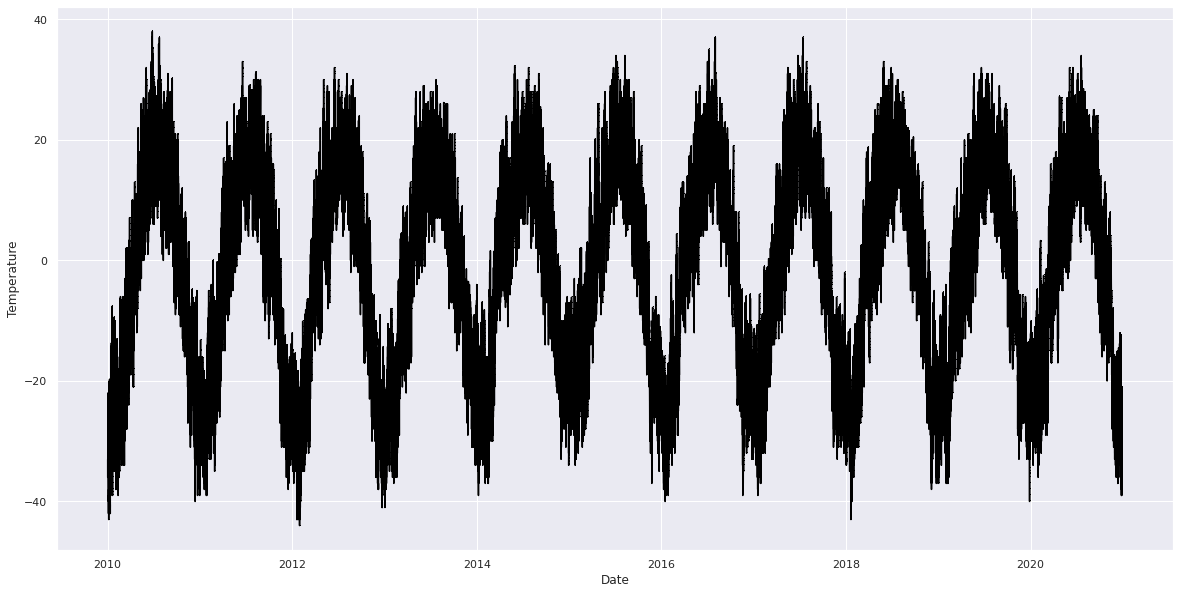

In [20]:
plt.plot(merged['Timestamp'], merged['Temperature'], color='black', marker=',')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

/home/barkowich/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


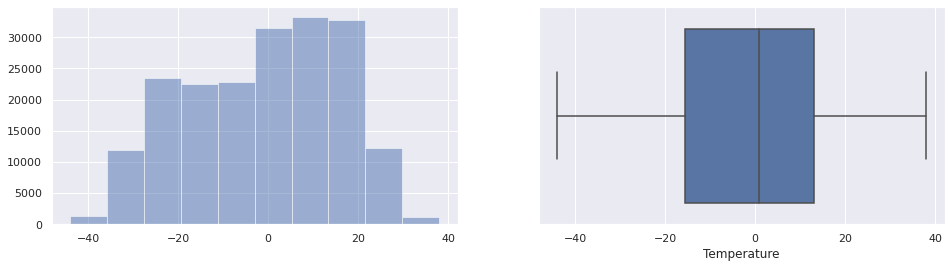

In [21]:
plotvariable(merged,'Temperature')

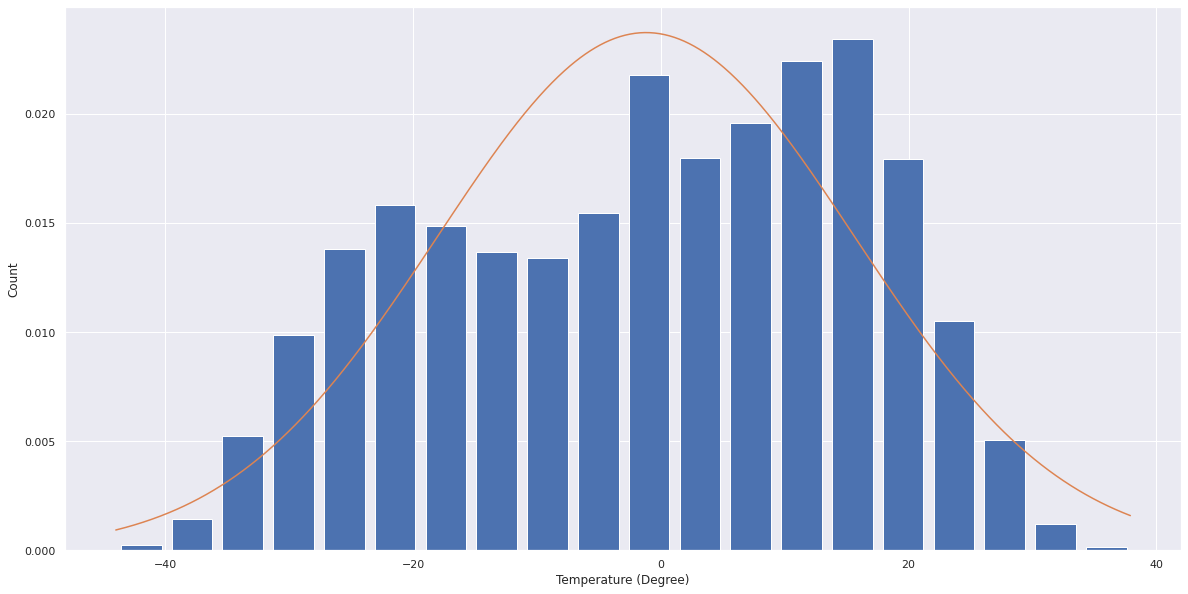

In [22]:
plot_bell(merged.Temperature, 'Temperature (Degree)')

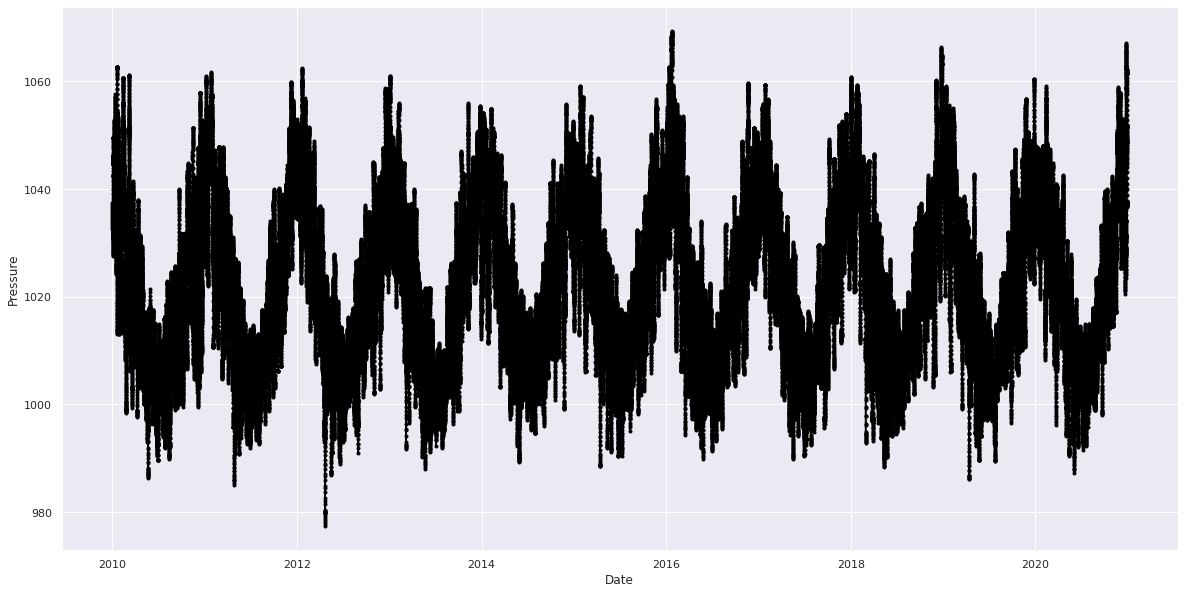

In [23]:
plt.plot(merged['Timestamp'], merged['Pressure'], color='black', marker='.')
plt.xlabel('Date')
plt.ylabel('Pressure')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

/home/barkowich/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


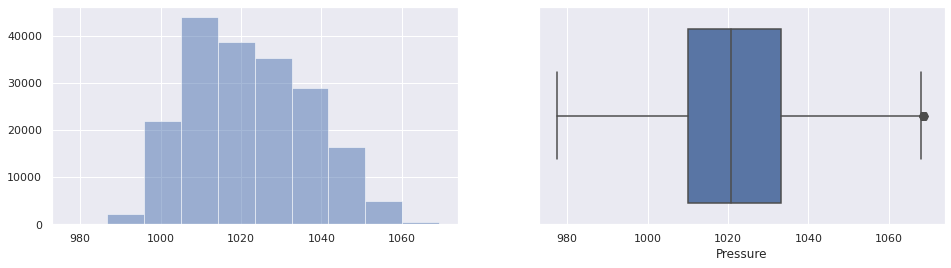

In [24]:
plotvariable(merged,'Pressure')

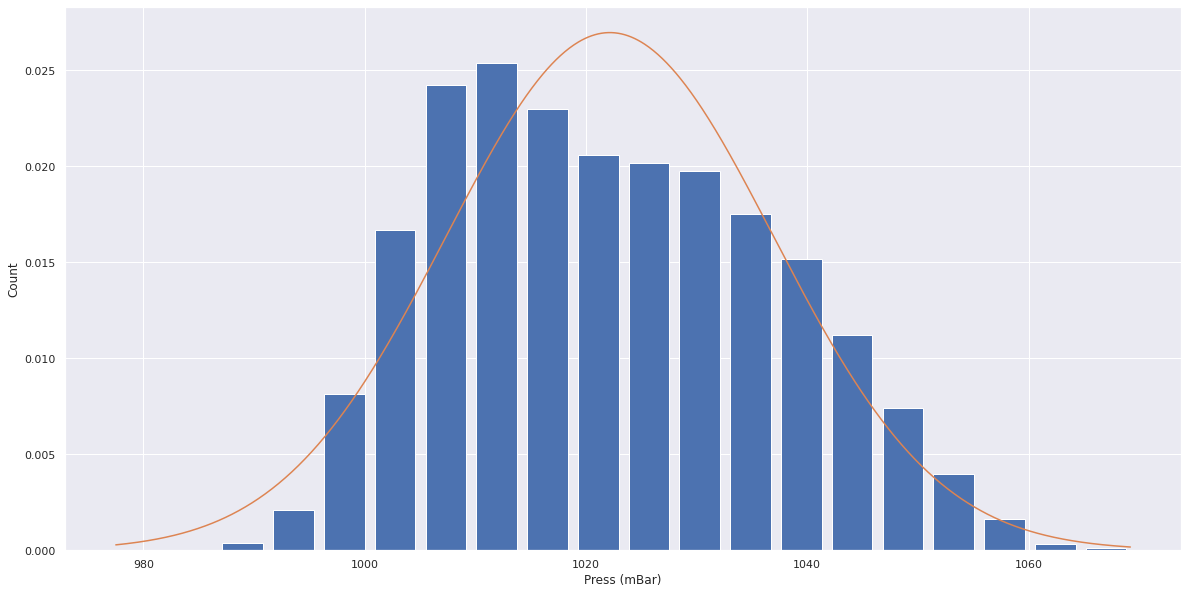

In [25]:
plot_bell(merged.Pressure, "Press (mBar)")

## **Detecting Outliers**

In [26]:
# outlier detection
def standart_division(data, threshhold = 3):
 upper_limit = data.mean() + threshhold * data.std()
 lower_limit = data.mean() - threshhold * data.std()
 return data[(data>upper_limit) | (data<lower_limit)]

In [27]:
## Даралтын утгаас бусад өгөгдлөөс outlier илрээгүй

standart_division(merged.Humidity, 3)

Series([], Name: Humidity, dtype: float64)

In [28]:
standart_division(merged.Pressure).head()

40395      977.500
106183    1066.700
106184    1066.925
106185    1067.150
106186    1067.375
Name: Pressure, dtype: float64

In [29]:
standart_division(merged.Temperature)

Series([], Name: Temperature, dtype: float64)

In [30]:
# Z-score аргаар outliers - ийг илрүүлэх

def z_score(data, name,threshhold=3):
  data_zscore = pd.DataFrame()
  data_zscore['Data'] = data
  data_zscore['zscore'] = ( data_zscore.Data - data_zscore.Data.mean() ) / data_zscore.Data.std()
  return data_zscore[(data_zscore.zscore < -threshhold) | (data_zscore.zscore > threshhold)]

In [31]:
z_score(merged.Humidity, 'Humidity',3)

,Data,zscore


In [32]:
raw_dat = z_score(merged.Pressure, 'Pressure') 
# Зөвхөн даралтын утгаас outliers илэрсэн

In [33]:
z_score(merged.Temperature, 'Temperature')

,Data,zscore


In [34]:
raw_dat['outlier'] = 1
merged = merged.join(raw_dat.outlier).fillna(0)
merged[merged['outlier']==1].sum()

/tmp/ipykernel_35769/1020422727.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged[merged['outlier']==1].sum()


Humidity          30.235500
Pressure       51160.166667
Temperature    -1493.400000
outlier           48.000000
dtype: float64

## **Standart Deviation**

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns

In [57]:
def standart_deviation(data):
    lower_limit = data.mean() - 3 * data.std()
    upper_limit = data.mean() + 3 * data.std()
    
    outlier = pd.DataFrame()
    outlier = data[(data<lower_limit) | (data>upper_limit)]
    return outlier

In [82]:
humid_outlier = standart_deviation(merged.Humidity)
humid_outlier.head()

Series([], Name: Humidity, dtype: float64)

In [81]:
tempr_outlier = standart_deviation(merged.Temperature)
tempr_outlier.head()

Series([], Name: Temperature, dtype: float64)

In [80]:
press_outlier = standart_deviation(merged.Pressure)
press_outlier.head()

40395      977.500
106183    1066.700
106184    1066.925
106185    1067.150
106186    1067.375
Name: Pressure, dtype: float64

## **Z_Score**

In [76]:
def z_score(data,threshhold=3):
  data_zscore = pd.DataFrame()
  data_zscore['Data'] = data
  data_zscore['zscore'] = ( data_zscore.Data - data_zscore.Data.mean() ) / data_zscore.Data.std()
  return data_zscore[(data_zscore.zscore < -threshhold) | (data_zscore.zscore > threshhold)]

In [83]:
humid_zscore = z_score(merged.Humidity)
humid_zscore.head()

,Data,zscore


In [84]:
press_zscore = z_score(merged.Pressure)
press_zscore.head()

,Data,zscore
40395,977.500,-3.018437
106183,1066.700,3.011648
106184,1066.925,3.026859
106185,1067.150,3.042069
106186,1067.375,3.057279


In [85]:
tempr_zscore = z_score(merged.Temperature)
tempr_zscore.head()

,Data,zscore


## **IQR method**

In [86]:
def iqr(data):
    Q1 = np.percentile(data , 25)
    Q3 = np.percentile(data , 75)
    IQR = Q3 - Q1
    upper_limit = Q3+1.5*IQR
    under_limit = Q1-1.5*IQR
    return data[(data > upper_limit) | (data < under_limit)]

In [88]:
humid_iqr = iqr(merged.Humidity)
humid_iqr.head()

Series([], Name: Humidity, dtype: float64)

In [89]:
press_iqr = iqr(merged.Pressure)
press_iqr.head()

106189    1068.050000
106190    1068.275000
106191    1068.500000
106192    1068.233333
106215    1068.200000
Name: Pressure, dtype: float64

In [90]:
tempr_iqr = iqr(merged.Temperature)
tempr_iqr.head()

Series([], Name: Temperature, dtype: float64)

## **Using Percentile for outlier**

In [93]:
def percentile(data):
    lower_limit, upper_limit = np.percentile(a=data,q=[0.5,99.5])
    return data[(data < lower_limit) | (data > upper_limit)]

In [99]:
humid_perc = percentile(merged.Humidity)
humid_perc.shape

(1571,)

In [98]:
press_perc = percentile(merged.Pressure)
press_perc.shape

(1915,)

In [97]:
tempr_perc = percentile(merged.Temperature)
tempr_perc.shape

(1592,)